# Figura de classe 1: construção de gráfico a partir dos dados em um arquivo txt

In [ ]:
#import math; graphs and os acessbility functions
import matplotlib.pyplot as plt #type: ignore
from filePathing import pathToDirForThisDevice
#file pathing
pathToDataReads = pathToDirForThisDevice

#open single file and read and associate to array
with open(pathToDataReads+"/50_nmDC_0.txt", "r") as file:
  lineReadings = file.readlines()
  arrayOfReads = []
  for line in lineReadings:
    singleLine = line.split() 
    associateLineFromFileWithArrayRow = [float(elem) for elem in singleLine]
    arrayOfReads.append(associateLineFromFileWithArrayRow)
    
#build axes from array
xAxisReadings = [row[0] for row in arrayOfReads]
yAxisReadings = [row[1] for row in arrayOfReads]

#symbol nonsense

#plot graph
plt.plot(xAxisReadings, yAxisReadings, "--s", color="b")
plt.xlabel("H (Oe)")
plt.xlim(-30, 30)
plt.ylabel("M/Ms")
plt.title("Magnetização (arb. unit) por Campo Externo (Oe)")
plt.legend(["⊥"], loc = "lower right", title="Orientação")
plt.grid()

# Figura de classe 2: interposição de dois datasets em um único gráfico

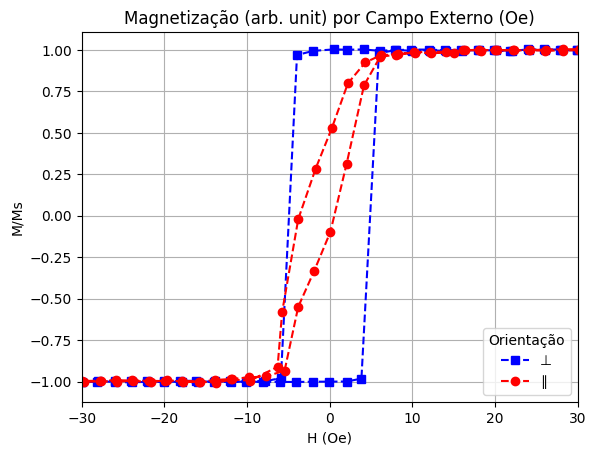

In [1]:
#import math; graphs and os acessbility functions
import matplotlib.pyplot as plt #type: ignore
from filePathing import pathToDirForThisDevice, ortogonalFileRead, paralelFileRead
#from filePathing import paralelFileDataRead

#file pathing
pathToDataReads = pathToDirForThisDevice

#open single file and read and associate to array
with open(pathToDataReads+ortogonalFileRead, "r") as file1:
  lineReadings = file1.readlines()
  arrayOfReads = []
  for line in lineReadings:
    singleLine = line.split() 
    associateLineFromFileWithArrayRow = [float(elem) for elem in singleLine]
    arrayOfReads.append(associateLineFromFileWithArrayRow)

#second dataset
with open(pathToDataReads+paralelFileRead, "r") as file2:
  lineReadingsFor2ndDataset = file2.readlines()
  arrayOfReadsFor2ndDataset = []
  for line in lineReadingsFor2ndDataset:
    singleLineIn2ndDataset = line.split()
    associateLineFromFileWithArrayRowFor2ndDataset = [float(elem) for elem in singleLineIn2ndDataset]
    arrayOfReadsFor2ndDataset.append(associateLineFromFileWithArrayRowFor2ndDataset)

#build axes from array
xAxisReadings = [row[0] for row in arrayOfReads]
yAxisReadings = [row[1] for row in arrayOfReads]

#build axes from second dataset
xAxisReadingsFor2ndDataset = [row[0] for row in arrayOfReadsFor2ndDataset]
yAxisReadingsFor2ndDataset = [row[1] for row in arrayOfReadsFor2ndDataset]
#plot graph
plt.plot(xAxisReadings, yAxisReadings, "--s", color="b")
plt.plot(xAxisReadingsFor2ndDataset, yAxisReadingsFor2ndDataset, "--o", color="r")
plt.xlim(-30, 30)
plt.xlabel("H (Oe)")
plt.ylabel("M/Ms")
plt.title("Magnetização (arb. unit) por Campo Externo (Oe)")
plt.legend(["⊥", "∥"], loc = "lower right", title="Orientação")
plt.grid()

# Calcular coefieciente

In [ ]:
#import math; graphs and os acessbility functions
import matplotlib.pyplot as plt #type: ignore
#file pathing
pathToDataReads = pathToDirForThisDevice

#open single file and read and associate to array
with open(pathToDataReads+"/50_nmDC_0.txt", "r") as file:
  lineReadings = file.readlines()
  arrayOfReads = []
  for line in lineReadings:
    singleLine = line.split() 
    associateLineFromFileWithArrayRow = [float(elem) for elem in singleLine]
    arrayOfReads.append(associateLineFromFileWithArrayRow)
    #coeficient shenanigans
  lenOfArray = len(arrayOfReads)
  magnet = float()
  for row in arrayOfReads:
    if (abs(row[1]) for row in arrayOfReads) < abs(magnet):
      magnet = row[1]
  print(magnet)
#the nonsense above doesn't work
    
#build axes from array

#symbol nonsense

#plot graph
k = """"
plt.plot(xAxisReadings, yAxisReadings, "-o")
plt.xlabel("H (Oe)")
plt.xlim(-30, 30)
plt.ylabel("M/Ms")
plt.title("Magnetização (arb. unit) por Campo Externo (Oe)")
plt.legend(["⊥"], loc = "lower right", title="Orientação")
plt.grid()
"""